Import necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Read the Excel file into a DataFrame

In [2]:

df = pd.read_excel("~/Desktop/Flight(1).xlsx")


Check for and remove duplicate rows

In [3]:

df.duplicated().sum()  # Checked duplicates, we have one duplicated observation.
df = df.drop_duplicates()  # We removed the duplicated row.
df.duplicated().sum()


0

Remove rows with missing values

In [4]:

df = df.dropna()


Clean column names by removing special characters and converting to lowercase

In [5]:

df.columns = df.columns.str.replace('"', '')
df.columns = df.columns.str.strip() 
df.columns = df.columns.str.replace('##', '')
df.columns = df.columns.str.lower()


Cleaning String Columns:

In [6]:

# Strip double quotes from the 'airline' column
df['airline'] = df['airline'].str.strip('"')

# Clean and format string columns
df['seat_place'] = df['seat_place'].str.title()
df['seat_place'] = df['seat_place'].str.replace('_', '')
df['day_of_week'] = df['day_of_week'].str.title()
df['cabin_type'] = df['cabin_type'].str.title()
df['cabin_type'] = df['cabin_type'].str.replace('_','#')
df['cabin_type'] = df['cabin_type'].str.strip('"')


Cleaning Numeric Columns:

In [7]:

# Convert 'duration_hours' column to numeric, handle errors, and fill missing values
df['duration_hours'] = pd.to_numeric(df['duration_hours'], errors='coerce')
invalid_rows = df[df['duration_hours'].isnull()]
mean_duration = df['duration_hours'].mean()
df['duration_hours'].fillna(mean_duration, inplace=True)

# Ensure certain numeric columns are non-negative
df['distance_km'] = df['distance_km'].abs()
df['price'] = df['price'].abs()
df['the number of passengers'] = df['the number of passengers'].abs()
df['baggage_fee'] = df['baggage_fee'].abs()

# Fill missing values with means or modes
mean_distance_km = df['distance_km'].mean()
df['distance_km'].fillna(mean_distance_km, inplace=True)
mode_duration_hours = df['duration_hours'].mode()[0]
df['duration_hours'].fillna(mode_duration_hours, inplace=True)
mean_price = df['price'].mean()
df['price'].fillna(mean_price, inplace=True)
mean_the_number_of_passengers = df['the number of passengers'].mean()
df['price'].fillna(mean_the_number_of_passengers, inplace=True)
mode_cabin_type = df['cabin_type'].mode()[0]
df['cabin_type'].fillna(mode_cabin_type, inplace=True)


Replacing Specific Values:

In [8]:

# Replace specific values in the DataFrame
df.replace('Heathrow', 'LHR', inplace=True)
df.replace(' Heathrow', 'LHR', inplace=True)
df.replace('heathrow', 'LHR', inplace=True)
df['seat_place'].replace('FirstClass', 'First Class', inplace=True)
df['destination airport'].replace('destination airport	', 'destination_airport', inplace=True)
df['the number of passengers'].replace('the number of passengers', 'the_number_of_passengers', inplace=True)
df['cabin_type'] = df['cabin_type'].replace('NA', '').str.strip()
df['cabin_type'].replace('S', 'Standard', inplace=True)
df['cabin_type'].replace('E', 'Economy', inplace=True)
df['cabin_type'].replace('L', 'Luxury', inplace=True)


Data Type Transformation:
Date Column Transformation:

In [9]:

# Converting 'DATE' column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M:%S')

# Getting only date part from 'DATE' column
df['date'] = df['date'].dt.date


Column Renaming

In [10]:

# Rename columns for clarity

df.rename(columns = {'flight_id':'FLIGHT ID','date':'DATE', 'airline':'AIRLINE','source_airport':'SOURCE AIRPORT',
                     'destination airport':'DESTINATION AIRPORT','duration_hours':'DURATION HOURS',
                     'seat_place':'SEAT PLACE','price':'PRICE','day_of_week':'DAY OF WEEK',
                     'distance_km':'DISTANCE KM', 'the number of passengers':'THE NUMBER OF PASSENGERS',
                     'delay_minutes':'DELAY MINUTES', 'baggage_fee':'BAGGAGE FEE', 'cabin_type':'CABIN TYPE' },
          inplace = True)


Saving to Excel:

In [11]:

df.to_excel('cleaned_dataframe.xlsx', index=False)
df


,FLIGHT ID,DATE,AIRLINE,SOURCE AIRPORT,DESTINATION AIRPORT,DURATION HOURS,SEAT PLACE,PRICE,DAY OF WEEK,DISTANCE KM,THE NUMBER OF PASSENGERS,DELAY MINUTES,BAGGAGE FEE,CABIN TYPE
0,1,2019-01-10,Delta Air Lines,LHR,LAX,7.5,Business,1200.0,Monday,8785.0,150,15,25,Standard
1,2,2019-02-15,American Airlines,JFK,CDG,6.0,Economy,800.0,Tuesday,5834.0,120,10,20,Economy
2,3,2019-03-20,United Airlines,LHR,HND,12.0,First Class,2500.0,Wednesday,9582.0,180,30,35,Luxury
3,4,2019-04-25,Air France,CDG,LHR,4.5,Economy,600.0,Thursday,3419.0,130,5,15,Economy
4,5,2019-05-30,Lufthansa,JFK,PEK,9.0,Business,1500.0,Friday,6835.0,110,20,30,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,2023-10-25,Qatar Airways,LAX,LHR,9.0,First Class,2200.0,Sunday,343.0,160,25,30,Luxury
141,141,2023-01-10,JetBlue Airways,JFK,PEK,6.0,Business,1200.0,Monday,3981.0,170,15,25,Standard
142,142,2023-02-15,Air Canada,HND,CDG,10.0,Economy,850.0,Tuesday,8785.0,150,20,20,Economy
143,143,2023-03-20,EVA Air,CDG,LHR,6.5,First Class,1800.0,Wednesday,2232.0,160,30,30,Luxury


In [12]:
df = pd.read_excel("~/Desktop/cleaned_dataframe.xlsx")

df

,FLIGHT ID,DATE,AIRLINE,SOURCE AIRPORT,DESTINATION AIRPORT,DURATION HOURS,SEAT PLACE,PRICE,DAY OF WEEK,DISTANCE KM,THE NUMBER OF PASSENGERS,DELAY MINUTES,BAGGAGE FEE,CABIN TYPE
0,1,2019-01-10,Delta Air Lines,LHR,LAX,7.5,Business,1200,Monday,8785,150,15,25,Standard
1,2,2019-02-15,American Airlines,JFK,CDG,6.0,Economy,800,Tuesday,5834,120,10,20,Economy
2,3,2019-03-20,United Airlines,LHR,HND,12.0,First Class,2500,Wednesday,9582,180,30,35,Luxury
3,4,2019-04-25,Air France,CDG,LHR,4.5,Economy,600,Thursday,3419,130,5,15,Economy
4,5,2019-05-30,Lufthansa,JFK,PEK,9.0,Business,1500,Friday,6835,110,20,30,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,140,2023-10-25,Qatar Airways,LAX,LHR,9.0,First Class,2200,Sunday,343,160,25,30,Luxury
133,141,2023-01-10,JetBlue Airways,JFK,PEK,6.0,Business,1200,Monday,3981,170,15,25,Standard
134,142,2023-02-15,Air Canada,HND,CDG,10.0,Economy,850,Tuesday,8785,150,20,20,Economy
135,143,2023-03-20,EVA Air,CDG,LHR,6.5,First Class,1800,Wednesday,2232,160,30,30,Luxury


In [13]:

# Assume your DataFrame is named 'df'
data_types = df.dtypes

# Get the data types of each column in the DataFrame
# The 'dtypes' attribute returns a Series with data type information for each column
# The resulting 'data_types' variable is a pandas Series where index is column names and values are data types
# Print the data types

print(data_types)
# This line prints the 'data_types' Series, which shows the data type of each column in the DataFrame 'df'
# The output will be a list of column names along with their corresponding data types


FLIGHT ID                            int64
DATE                        datetime64[ns]
AIRLINE                             object
SOURCE AIRPORT                      object
DESTINATION AIRPORT                 object
DURATION HOURS                     float64
SEAT PLACE                          object
PRICE                                int64
DAY OF WEEK                         object
DISTANCE KM                          int64
THE NUMBER OF PASSENGERS             int64
DELAY MINUTES                        int64
BAGGAGE FEE                          int64
CABIN TYPE                          object
dtype: object


Data Type Conversion for Selected Columns:

In [14]:
# Explanation

# Convert 'FLIGHT ID' column to string data type
# The 'astype' method is used to convert the data type of the 'FLIGHT ID' column to 'str' (string).
df['FLIGHT ID'] = df['FLIGHT ID'].astype(str)

# Convert 'PRICE' column to integer data type
# The 'astype' method is used to convert the data type of the 'PRICE' column to 'int' (integer).
df['PRICE'] = df['PRICE'].astype(int)

# Convert 'DISTANCE KM' column to integer data type
# The 'astype' method is used to convert the data type of the 'DISTANCE KM' column to 'int' (integer).
df['DISTANCE KM'] = df['DISTANCE KM'].astype(int)

# Convert 'CABIN TYPE' column to string data type
# The 'astype' method is used to convert the data type of the 'CABIN TYPE' column to 'str' (string).
df['CABIN TYPE'] = df['CABIN TYPE'].astype(str)

# Print the data types of each column after the conversions
# The 'dtypes' attribute is used to display the data types of each column in the DataFrame.
print(df.dtypes)


FLIGHT ID                           object
DATE                        datetime64[ns]
AIRLINE                             object
SOURCE AIRPORT                      object
DESTINATION AIRPORT                 object
DURATION HOURS                     float64
SEAT PLACE                          object
PRICE                                int64
DAY OF WEEK                         object
DISTANCE KM                          int64
THE NUMBER OF PASSENGERS             int64
DELAY MINUTES                        int64
BAGGAGE FEE                          int64
CABIN TYPE                          object
dtype: object


Counting Airlines in DataFrame:

In [15]:

# Count the number of unique airlines
airline_count = df['AIRLINE'].nunique()
print("Total Airlines:", airline_count)

# Alternatively, count occurrences for each airline
airline_counts = df['AIRLINE'].value_counts()
print("Airlines:\n", airline_counts)

# Explanation:
# 'nunique()' counts unique airlines in 'AIRLINE' column.
# 'value_counts()' tallies occurrences of each airline.


Total Airlines: 22
Airlines:
 AIRLINE
Qantas                      13
EVA Air                      7
United Airlines              7
Air France                   7
Lufthansa                    7
British Airways              7
Singapore Airlines           7
South African Airways        7
American Airlines            7
JetBlue Airways              7
Air Canada                   7
Delta Air Lines              6
Southwest Airlines           6
Cathay Pacific               6
Qatar Airways                6
Alaska Airlines              6
Emirates                     6
ANA - All Nippon Airways     6
Virgin Atlantic              5
Turkish Airlines             5
Turkish_Airlines             1
Alaska_Airlines              1
Name: count, dtype: int64


Counting the Number of Source Airports:

In [16]:

# Count the number of frequencies for each source airport
airport_counts = df['SOURCE AIRPORT'].value_counts()

# Print the number of source airports and their frequencies
print("Number of Source Airports:\n", airport_counts)

# Explanation:
# - The 'value_counts()' method counts frequencies of each unique source airport in the 'SOURCE AIRPORT' column.
# - The result is printed, displaying the number of source airports and their respective frequencies.


Number of Source Airports:
 SOURCE AIRPORT
JFK    33
CDG    27
LAX    26
LHR    24
HND    14
PEK    13
Name: count, dtype: int64


Counting the Number of Destination Airports:

In [17]:

# Count the number of frequency for each destination airport
airport_counts = df['DESTINATION AIRPORT'].value_counts()

# Print the number of destination airports and their frequency
print("Number of Destination Airports:\n", airport_counts)

# Explanation:
# - The 'value_counts()' method counts frequency of each unique destination airport in the 'DESTINATION AIRPORT' column.
# - The result is printed, displaying the number of destination airports and their respective frequencies.


Number of Destination Airports:
 DESTINATION AIRPORT
CDG     36
HND     30
LHR     27
LAX     22
PEK     14
JFK      7
 HND     1
Name: count, dtype: int64


Summary Statistics for 'DURATION HOURS'

In [18]:

summary_stats = df['DURATION HOURS'].describe()

print("Summary Statistic About DURATION HOURS\n")
print(summary_stats)


#  Explanation:
#   The describe() method is utilized to calculate summary statistics for the 'DURATION HOURS' #column, 
#   including mean, standard deviation, quartiles, and other relevant metrics.
#   The print statements display the obtained summary statistics for 'DURATION HOURS', providing 
#   insights into the central tendency and distribution of the data. 


Summary Statistic About DURATION HOURS

count    137.000000
mean       7.596296
std        2.915789
min        2.000000
25%        5.500000
50%        7.500000
75%        9.000000
max       13.500000
Name: DURATION HOURS, dtype: float64


Counting the Number of Seat Place:

In [19]:

# Count the number of unique seat places
seat_place_count = df['SEAT PLACE'].nunique()
print("Types of Seat Place:", seat_place_count)

# Alternatively, count the number of occurrences for each seat place
seat_place_counts = df['SEAT PLACE'].value_counts()
print("Number of Seat Place:\n", seat_place_counts)

# Explanation:
# - The 'nunique()' method counts the number of unique values in the 'SEAT PLACE' column, representing different types of seat places.
# - The 'value_counts()' method tallies occurrences of each unique seat place, providing a distribution of seat types.


Types of Seat Place: 3
Number of Seat Place:
 SEAT PLACE
Economy        56
Business       42
First Class    39
Name: count, dtype: int64


Summary Statistics for 'PRICE'

In [20]:

# Calculate and Print Summary Statistics for 'PRICE'
price_summary_stats = df['PRICE'].describe()

# Print Summary Statistics for 'PRICE'
print("Summary Statistics for PRICE:\n")
print(price_summary_stats)

# Explanation:
# - The 'describe()' method is used to calculate summary statistics for the 'PRICE' column, including mean, standard deviation, quartiles, and other relevant metrics.
# - The result is printed, providing insights into the distribution and central tendency of the price data.


Summary Statistics for PRICE:

count     137.000000
mean     1300.729927
std       755.421226
min       400.000000
25%       700.000000
50%      1100.000000
75%      2000.000000
max      2800.000000
Name: PRICE, dtype: float64


Count the number of frequency for each day of the week

In [21]:

# Count the number of frequency for each day of the week
day_of_week_counts = df['DAY OF WEEK'].value_counts()

# Print the number of frequency for each day of the week
print("Number of Day of Week:\n", day_of_week_counts)

# Explanation:
# - The 'value_counts()' method is applied to the 'DAY OF WEEK' column, counting frequency for each unique day of the week.
# - The result is printed, displaying the number of frequency for each day of the week.


Number of Day of Week:
 DAY OF WEEK
Tuesday      21
Monday       20
Wednesday    20
Thursday     20
Saturday     19
Sunday       19
Friday       18
Name: count, dtype: int64


Summary Statistics for 'DISTANCE KM'

In [22]:

# Calculate and Print Summary Statistics for 'DISTANCE KM'
distance_summary_stats = df['DISTANCE KM'].describe()

# Print Summary Statistics for 'DISTANCE KM'
print("Summary Statistics for DISTANCE KM\n")
print(distance_summary_stats)

# Explanation:
# - The 'describe()' method is used to calculate summary statistics for the 'DISTANCE KM' column, including mean, standard deviation, quartiles, and other relevant metrics.
# - The result is printed, providing insights into the distribution and central tendency of the distance data.


Summary Statistics for DISTANCE KM

count     137.000000
mean     5032.934307
std      3102.020336
min       341.000000
25%      2232.000000
50%      5546.000000
75%      8785.000000
max      9582.000000
Name: DISTANCE KM, dtype: float64


Summary Statistics for 'DELAY MINUTES'

In [23]:

# Calculate and Print Summary Statistics for 'DELAY MINUTES'
delay_summary_stats = df['DELAY MINUTES'].describe()

# Print Summary Statistics for 'DELAY MINUTES'
print("Summary Statistics for DELAY MINUTES:\n")
print(delay_summary_stats)

# Explanation:
# - The 'describe()' method is used to calculate summary statistics for the 'DELAY MINUTES' column, including mean, standard deviation, quartiles, and other relevant metrics.
# - The result is printed, providing insights into the distribution and central tendency of the delay minutes data.


Summary Statistics for DELAY MINUTES:

count    137.000000
mean      18.138686
std        7.549038
min        5.000000
25%       15.000000
50%       20.000000
75%       25.000000
max       30.000000
Name: DELAY MINUTES, dtype: float64


Summary Statistics for 'BAGGAGE FEE'

In [24]:

# Calculate and Print Summary Statistics for 'BAGGAGE FEE'
baggage_fee_summary_stats = df['BAGGAGE FEE'].describe()

# Print Summary Statistics for 'BAGGAGE FEE'
print("Summary Statistics for BAGGAGE FEE:\n")
print(baggage_fee_summary_stats)

# Explanation:
# - The 'describe()' method is used to calculate summary statistics for the 'BAGGAGE FEE' column, including mean, standard deviation, quartiles, and other relevant metrics.
# - The result is printed, providing insights into the distribution and central tendency of the baggage fee data.


Summary Statistics for BAGGAGE FEE:

count    137.000000
mean      25.912409
std        5.947657
min       15.000000
25%       20.000000
50%       25.000000
75%       30.000000
max       35.000000
Name: BAGGAGE FEE, dtype: float64


Count The Number of Frequency Cabin Types 

In [25]:

# Count the number of frequency cabin types
cabin_type_count = df['CABIN TYPE'].nunique()
print("Types of Cabin Type:", cabin_type_count)

# Alternatively, count the number of occurrences for each cabin type
cabin_type_counts = df['CABIN TYPE'].value_counts()
print("Number of Cabin Type:\n", cabin_type_counts)

# Explanation:
# - The 'nunique()' method counts the number of unique values in the 'CABIN TYPE' column, representing different types of cabin classes.
# - The 'value_counts()' method tallies occurrences of each unique cabin type, providing a distribution of cabin classes.


Types of Cabin Type: 3
Number of Cabin Type:
 CABIN TYPE
Luxury      51
Economy     47
Standard    39
Name: count, dtype: int64


GRAPHS

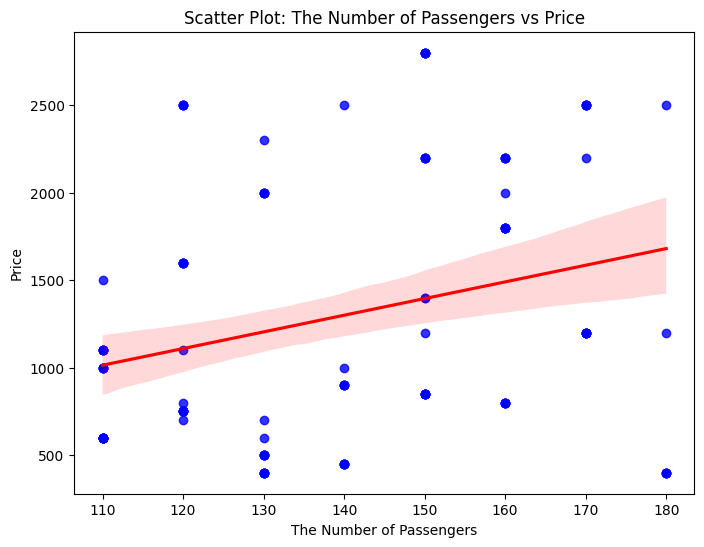

In [26]:

# Scatter plot visualization
plt.figure(figsize=(8, 6))
sns.regplot(x='THE NUMBER OF PASSENGERS', y='PRICE', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Add title and axis labels
plt.title('Scatter Plot: The Number of Passengers vs Price')
plt.xlabel('The Number of Passengers')
plt.ylabel('Price')

# Display the plot
plt.show()

#### Explanation:
#### - The code uses sns.regplot to create a scatter plot of 'The Number of Passengers' against 'Price' with a regression line.
#### - The scatter_kws and line_kws parameters set the color of the scatter points and regression line, respectively.
#### - Title and axis labels are added using plt.title, plt.xlabel, and plt.ylabel.
#### - The plot is displayed using plt.show().


In [27]:

# Violin plot using Plotly Express
fig = px.violin(df, x='CABIN TYPE', y='PRICE', box=True, points='all', color='CABIN TYPE', hover_data=df.columns)

# Set the title
fig.update_layout(title_text='Violin Plot of Prices for Each Cabin Type', title_x=0.5)

# Display the plot
fig.show()

#### Explanation:
#### - The code utilizes Plotly Express (px) to create a violin plot of 'PRICE' for each 'CABIN TYPE'.
#### - The 'box=True' parameter adds a box plot inside each violin.
#### - 'points='all'' adds individual data points to the plot.
#### - 'color='CABIN TYPE'' ensures each violin is colored based on the 'CABIN TYPE'.
#### - Hover information includes data from all columns in the DataFrame.
#### - The resulting plot is displayed using fig.show().


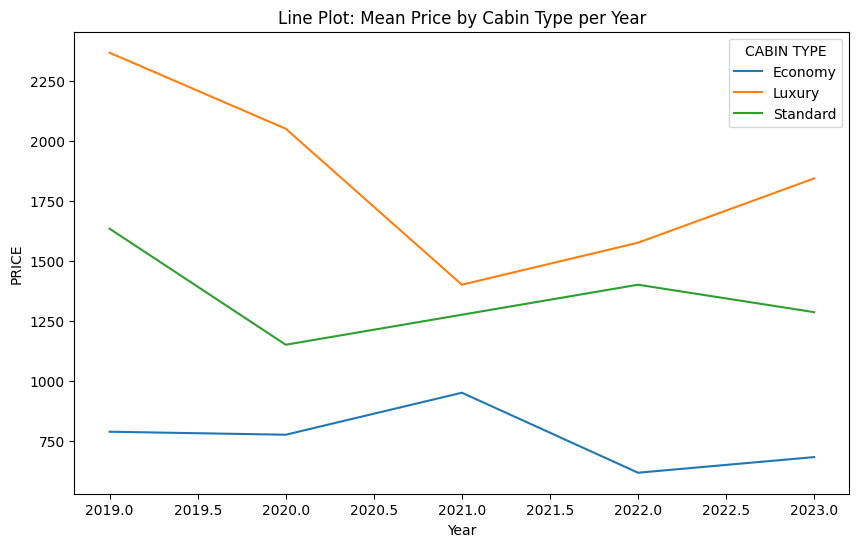

In [28]:

# Assuming 'DATE' is in string format, convert it to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract the year from the 'DATE' column
df['Year'] = df['DATE'].dt.year

# Find the mean price for each cabin type and year
mean_prices = df.groupby(['CABIN TYPE', 'Year'])['PRICE'].mean().reset_index()

# Plot the results (you can customize the plot based on your preference)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='PRICE', hue='CABIN TYPE', data=mean_prices)
plt.title('Line Plot: Mean Price by Cabin Type per Year')
plt.show()

#### Explanation:
#### - The 'pd.to_datetime()' method is applied to convert the 'DATE' column from string to datetime format.
#### - The 'dt.year' attribute extracts the year from the 'DATE' column, creating a new 'Year' column in the DataFrame.
#### - Using 'groupby', the mean price for each combination of 'CABIN TYPE' and 'Year' is calculated and stored in the 'mean_prices' DataFrame.
#### - The line plot depicts the mean price trends over the years for each cabin type using seaborn's lineplot function.
#### - Title and axis labels are added for clarity, and the resulting plot is displayed using plt.show().


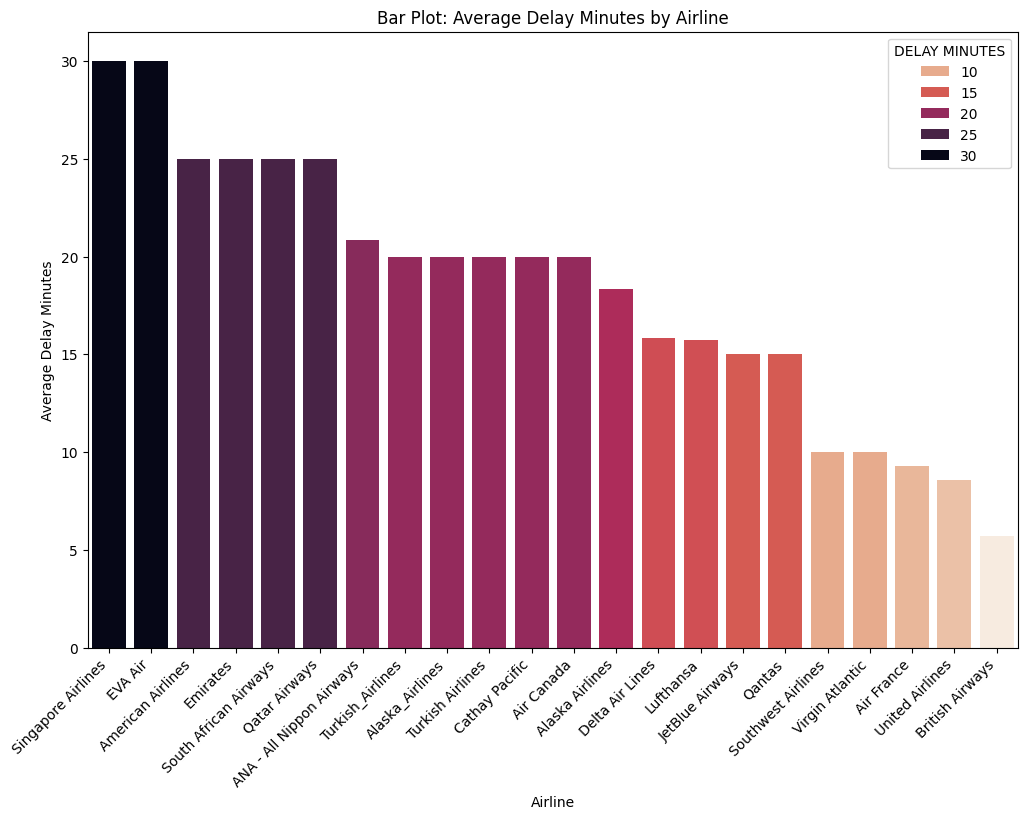

In [29]:

# Calculate average delay minutes by airline
average_delays = df.groupby('AIRLINE')['DELAY MINUTES'].mean().reset_index()

# Sort in descending order
average_delays = average_delays.sort_values(by='DELAY MINUTES', ascending=False)

# Create a bar plot with the reversed rocket color palette
plt.figure(figsize=(12, 8))
sns.barplot(x='AIRLINE', y='DELAY MINUTES', data=average_delays, palette='rocket_r', hue='DELAY MINUTES', dodge=False)
plt.title('Bar Plot: Average Delay Minutes by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay Minutes')
plt.xticks(rotation=45, ha='right')

# Save the plot to a file
plt.savefig('average_delay_minutes_reversed_rocket.png')

# Show the plot
plt.show()

#### Explanation:
#### - The code calculates the average delay minutes for each airline and creates a bar plot using seaborn's barplot function.
#### - The 'rocket_r' color palette is applied for a reversed visual effect.
#### - The 'hue' parameter is used to differentiate bars based on the 'DELAY MINUTES'.
#### - The resulting plot is saved as 'average_delay_minutes_reversed_rocket.png' using plt.savefig.
#### - The plot is also displayed using plt.show().
